NIM : 105222011
Nama : Ridho Pratama Widiantoro

        SOURCE CODE UTS MACHINE LEARNING STUDI CASE 1
        

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay


In [18]:
file_path = 'Digital Literacy Data Indonesia DIB Revision 2.csv'
with open(file_path, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    delimiter = csv.Sniffer().sniff(sample).delimiter

df = pd.read_csv(file_path, delimiter=delimiter)

In [19]:
kolom_skor = [
    'Technological_Skill_AverageScore',
    'Personal_Security_Skill_AverageScore',
    'Critical_Skill_AverageScore',
    'Device_Security_Skill_AverageScore',
    'Informational_Skill_AverageScore',
    'Communication_Skill_AverageScore'
]

for kolom in kolom_skor:
    df[kolom] = df[kolom].astype(str).str.replace(',', '.').astype(float)

In [33]:
le = LabelEncoder()
df['Label_Gender'] = le.fit_transform(df['Gender']) 

In [21]:
X = df[kolom_skor]
y = df['Label_Gender']

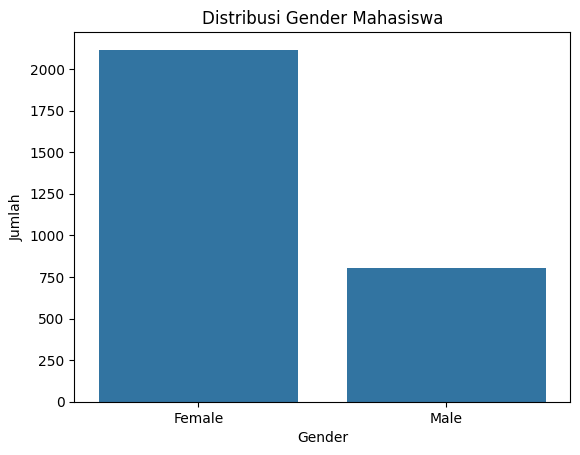

In [31]:
sns.countplot(data=df, x='Gender')
plt.title('Distribusi Gender Mahasiswa')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()



In [32]:
rata_rata_subskala = df[kolom_skor].mean().sort_values(ascending=False)
print(rata_rata_subskala)


Personal_Security_Skill_AverageScore    4.374786
Technological_Skill_AverageScore        4.145840
Communication_Skill_AverageScore        4.041082
Critical_Skill_AverageScore             4.019788
Device_Security_Skill_AverageScore      3.708833
Informational_Skill_AverageScore        3.258542
dtype: float64


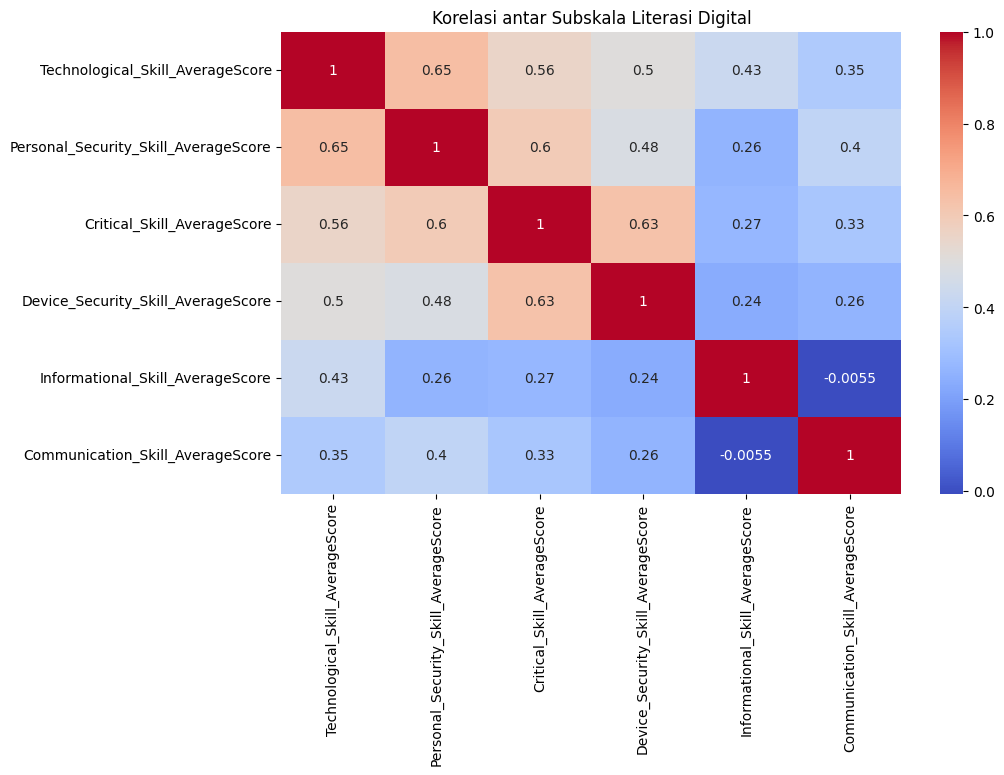

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Subskala Literasi Digital')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[Laporan Decision Tree]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       414
           1       0.32      0.34      0.33       171

    accuracy                           0.59       585
   macro avg       0.52      0.52      0.52       585
weighted avg       0.60      0.59      0.60       585



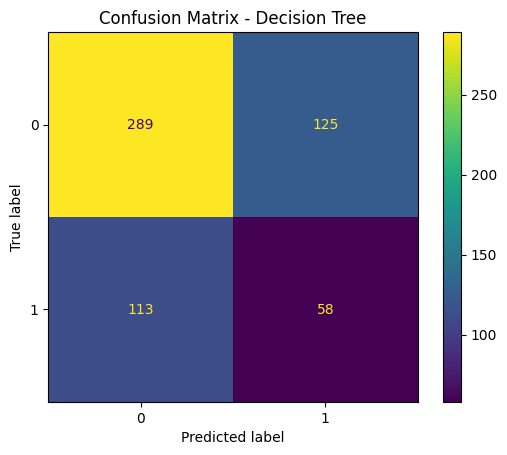

In [25]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("\n[Laporan Decision Tree]")
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)
plt.title('Confusion Matrix - Decision Tree')
plt.show()



[Laporan Random Forest]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       414
           1       0.39      0.18      0.24       171

    accuracy                           0.68       585
   macro avg       0.56      0.53      0.52       585
weighted avg       0.63      0.68      0.64       585



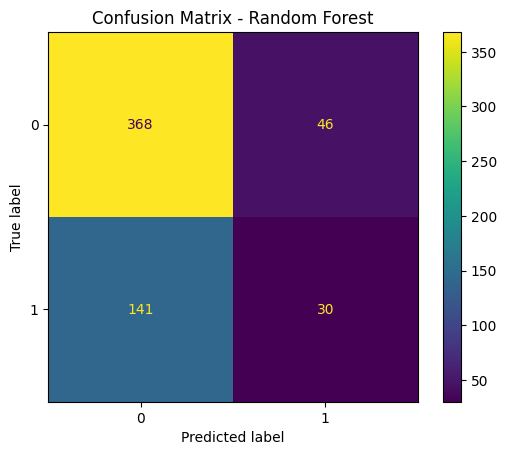

In [26]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\n[Laporan Random Forest]")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()


[Laporan SVM]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       414
           1       0.00      0.00      0.00       171

    accuracy                           0.71       585
   macro avg       0.35      0.50      0.41       585
weighted avg       0.50      0.71      0.59       585



c:\Users\ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

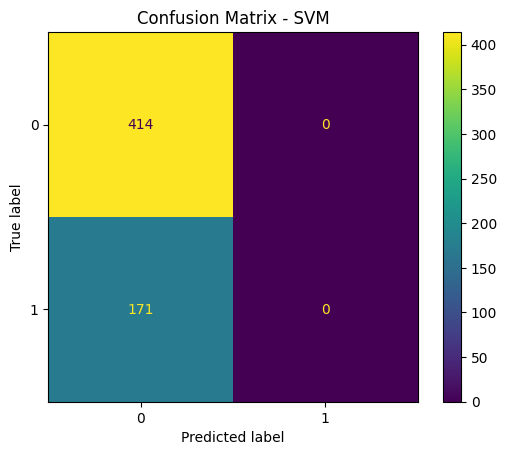

In [27]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("\n[Laporan SVM]")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)
plt.title('Confusion Matrix - SVM')
plt.show()

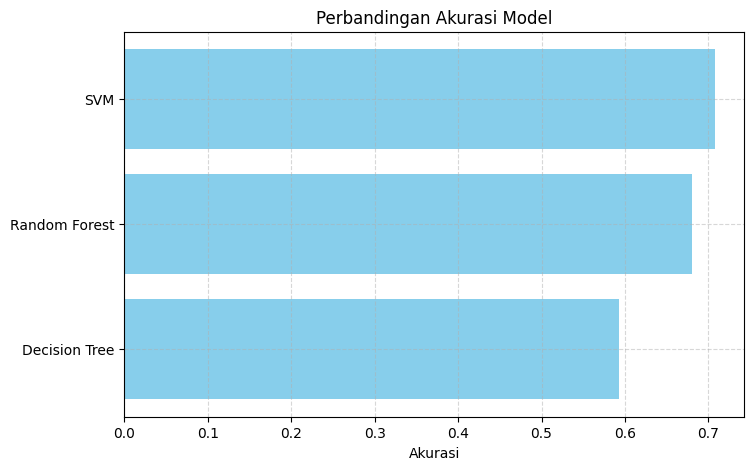

In [28]:
akurasi_model = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(8,5))
plt.barh(list(akurasi_model.keys()), list(akurasi_model.values()), color='skyblue')
plt.xlabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [29]:
print("\n[Perbandingan Akurasi Model]")
for nama_model, akurasi in akurasi_model.items():
    print(f"{nama_model}: {akurasi:.4f}")



[Perbandingan Akurasi Model]
Decision Tree: 0.5932
Random Forest: 0.6803
SVM: 0.7077
